In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import skeletonize
from data_frame import getDataFrame

True

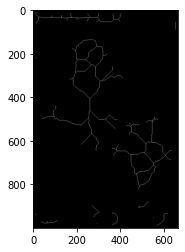

In [5]:
img = cv2.imread('../../herbarium-2022-fgvc9/train_images/000/00/00000__002.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5,5), 0)

# sobel filter edge
edge = cv2.Sobel(blur, cv2.CV_64F, 1, 1, ksize=5)
mask = cv2.inRange(edge, (-1000000), (0))
edge[mask>0] = 0
mask2 = cv2.inRange(edge,(255), (1000000))
edge[mask2>0] = 255
edge = edge.astype(np.uint8)

# canny edge
edge2 = cv2.Canny(gray, 100, 200)

kernel = np.ones((3,3), np.uint8)

img_erosion = cv2.erode(edge, kernel, ineratoon = 15)
img_dilation = cv2.dilate(edge, kernel, iterations=15)


biedge = img_dilation.astype(float)/255
biedge = biedge.astype(np.uint8)  
skel = skeletonize(biedge)
plt.imshow(img_dilation, cmap='gray')
skel = (skel*255).astype(np.uint8)
plt.imshow(skel, cmap='gray')
cv2.imwrite('../../skel.jpg', skel)
cv2.imwrite('../../edge.jpg', edge)
cv2.imwrite('../../gray.jpg', gray)
cv2.imwrite('../../edge2.jpg', edge2)
cv2.imwrite('../../')


In [30]:
# enhance contrast
img = cv2.imread('../../herbarium-2022-fgvc9/train_images/000/00/00000__002.jpg')
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

l_channel = lab[:,:,0]
ab_channel = lab[:,:,1:]
# Applying CLAHE to L-channel
# feel free to try different values for the limit and grid size:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl = clahe.apply(l_channel)

# merge the CLAHE enhanced L-channel with the a and b channel
limg = cv2.merge((cl,ab_channel))

# Converting image from LAB Color model to BGR color spcae
enhanced_img = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

# Stacking the original image with the enhanced image

cv2.imwrite('../../contrast.jpg', enhanced_img)

True

In [ ]:
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# blur = cv2.GaussianBlur(gray, (3,3), 0)

# laplacian = cv2.Laplacian(img,cv2.CV_64F)
# cv2.imwrite('../laplacian.jpg', laplacian)

# dx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
# dy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
# grad = cv2.Sobel(blur, cv2.CV_64F, 1, 1, ksize=5)
# cv2.imwrite('../grad.jpg', grad)

# canny = cv2.Canny(gray, 100, 200)
# cv2.imwrite('../canny.jpg', canny)
# canny = canny.astype(float)/255
# canny.astype(np.int8)

# skeletonized = skeletonize(canny)

# skeletonized = skeletonized * 255
# cv2.imwrite('../output.jpg', skeletonized)
# #grad = exposure.rescale_intensity(grad, in_range='image', out_range=(0,255)).clip(0,255).astype(np.uint8)

# temp = cv2.imread('../grad.jpg')
# blur = cv2.medianBlur(temp, 3)
# cv2.imwrite('../temp.jpg', blur)